In [1]:
import torch

In [3]:
!pip install --upgrade diffusers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 33.2 MB/s eta 0:00:00


In [4]:
from diffusers import DiffusionPipeline, LCMScheduler

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [5]:
model_id = "stabilityai/stable-diffusion-xl-base-1.0"
lcm_lora_id = "latent-consistency/lcm-lora-sdxl"

In [6]:
pipe = DiffusionPipeline.from_pretrained(model_id, variant = "fp16")

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [7]:
pipe.load_lora_weights(lcm_lora_id)

pytorch_lora_weights.safetensors:   0%|          | 0.00/394M [00:00<?, ?B/s]

In [8]:
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)

The config attributes {'skip_prk_steps': True} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


In [9]:
pipe.to(device="cuda", dtype=torch.float16)

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.23.1",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "force_zeros_for_empty_prompt": true,
  "scheduler": [
    "diffusers",
    "LCMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [10]:
prompt = "close-up photography of an old man standing in the rain at night, in a street light by lamps, leica 35mm summilux"

In [11]:
images = pipe(
    prompt = prompt,
    num_inference_steps = 5,
    guidance_scale = 1,
).images[0]

  0%|          | 0/5 [00:00<?, ?it/s]

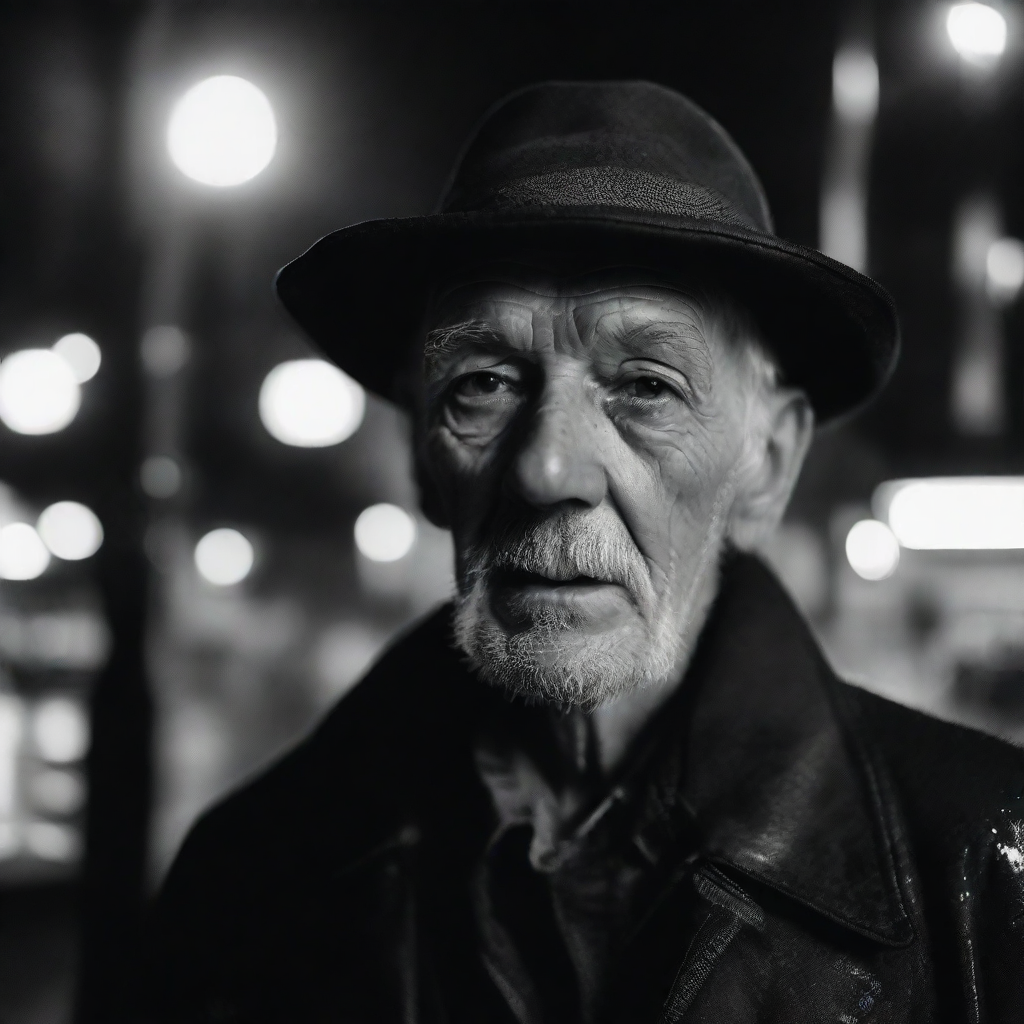

In [13]:
images

In [23]:
images = []
for steps in range(8):
  generator = torch.Generator(device = pipe.device).manual_seed(1337)
  image = pipe(
      prompt = prompt,
      num_inference_steps = steps+1,
      guidance_scale = 1,
      generator = generator,
  ).images[0]
  images.append(image)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [24]:
images

[<PIL.Image.Image image mode=RGB size=1024x1024>,
 <PIL.Image.Image image mode=RGB size=1024x1024>,
 <PIL.Image.Image image mode=RGB size=1024x1024>,
 <PIL.Image.Image image mode=RGB size=1024x1024>,
 <PIL.Image.Image image mode=RGB size=1024x1024>,
 <PIL.Image.Image image mode=RGB size=1024x1024>,
 <PIL.Image.Image image mode=RGB size=1024x1024>,
 <PIL.Image.Image image mode=RGB size=1024x1024>]

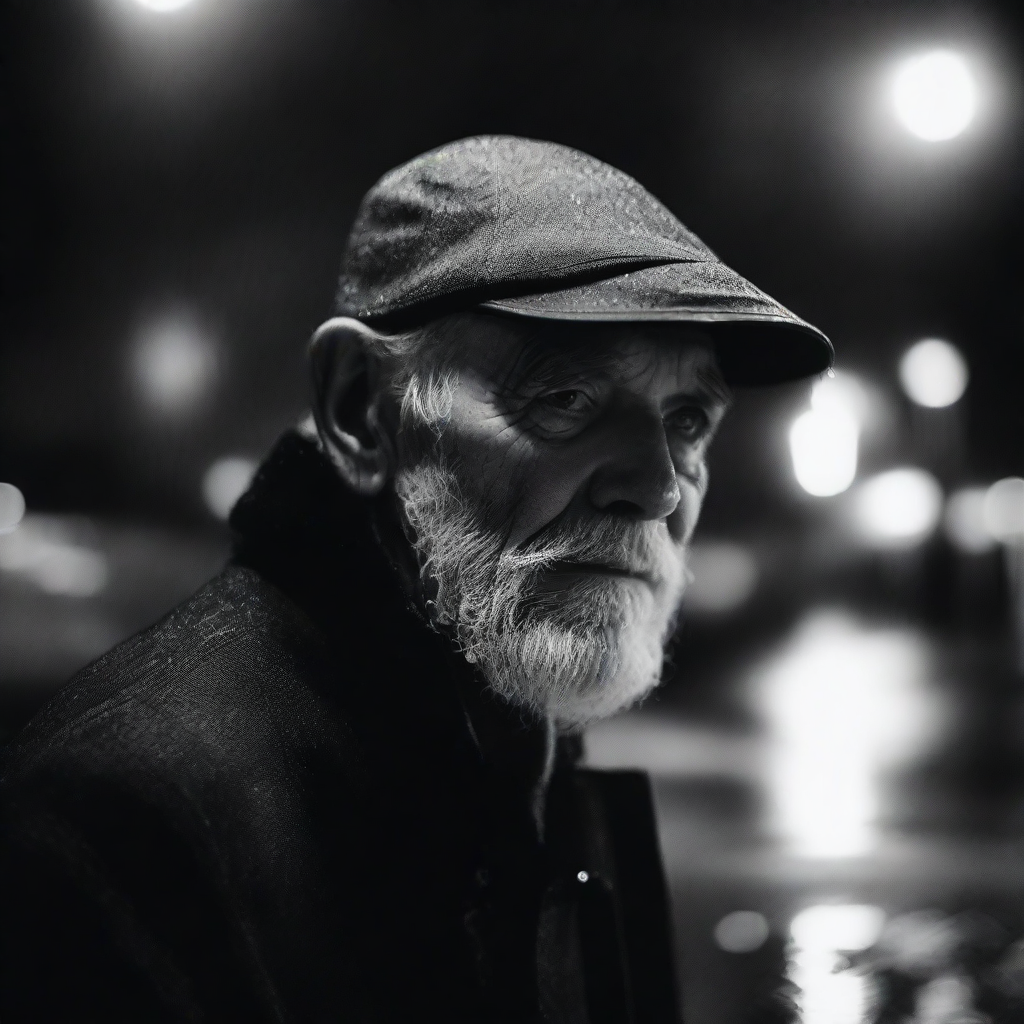

In [29]:
images[7]

# Few Info

1. Guidance scale: 0 to 2

2. If 0 to 1: negative prompts are ignored, and if it is 1-2, negative prompts and bit slower

In [30]:
pipe.unload_lora_weights()

You are using `unload_lora_weights` to disable and unload lora weights. If you want to iteratively enable and disable adapter weights,you can use `pipe.enable_lora()` or `pipe.disable_lora()`. After installing the latest version of PEFT.
/usr/local/lib/python3.10/dist-packages/diffusers/loaders.py:1876: FutureWarning: `_remove_text_encoder_monkey_patch_classmethod` is deprecated and will be removed in version 0.25. You are using an old version of LoRA backend. This will be deprecated in the next releases in favor of PEFT make sure to install the latest PEFT and transformers packages in the future.
  deprecate("_remove_text_encoder_monkey_patch_classmethod", "0.25", LORA_DEPRECATION_MESSAGE)


In [31]:
from diffusers import EulerDiscreteScheduler

In [32]:
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)

In [34]:
images = []
for steps in (1, 4, 8, 15, 25, 30, 50):
  generator = torch.Generator(device = pipe.device).manual_seed(1337)
  image = pipe(
      prompt = prompt,
      num_inference_steps = steps,
      generator = generator,
  ).images[0]
  images.append(image)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [36]:
images

[<PIL.Image.Image image mode=RGB size=1024x1024>,
 <PIL.Image.Image image mode=RGB size=1024x1024>,
 <PIL.Image.Image image mode=RGB size=1024x1024>,
 <PIL.Image.Image image mode=RGB size=1024x1024>,
 <PIL.Image.Image image mode=RGB size=1024x1024>,
 <PIL.Image.Image image mode=RGB size=1024x1024>,
 <PIL.Image.Image image mode=RGB size=1024x1024>]

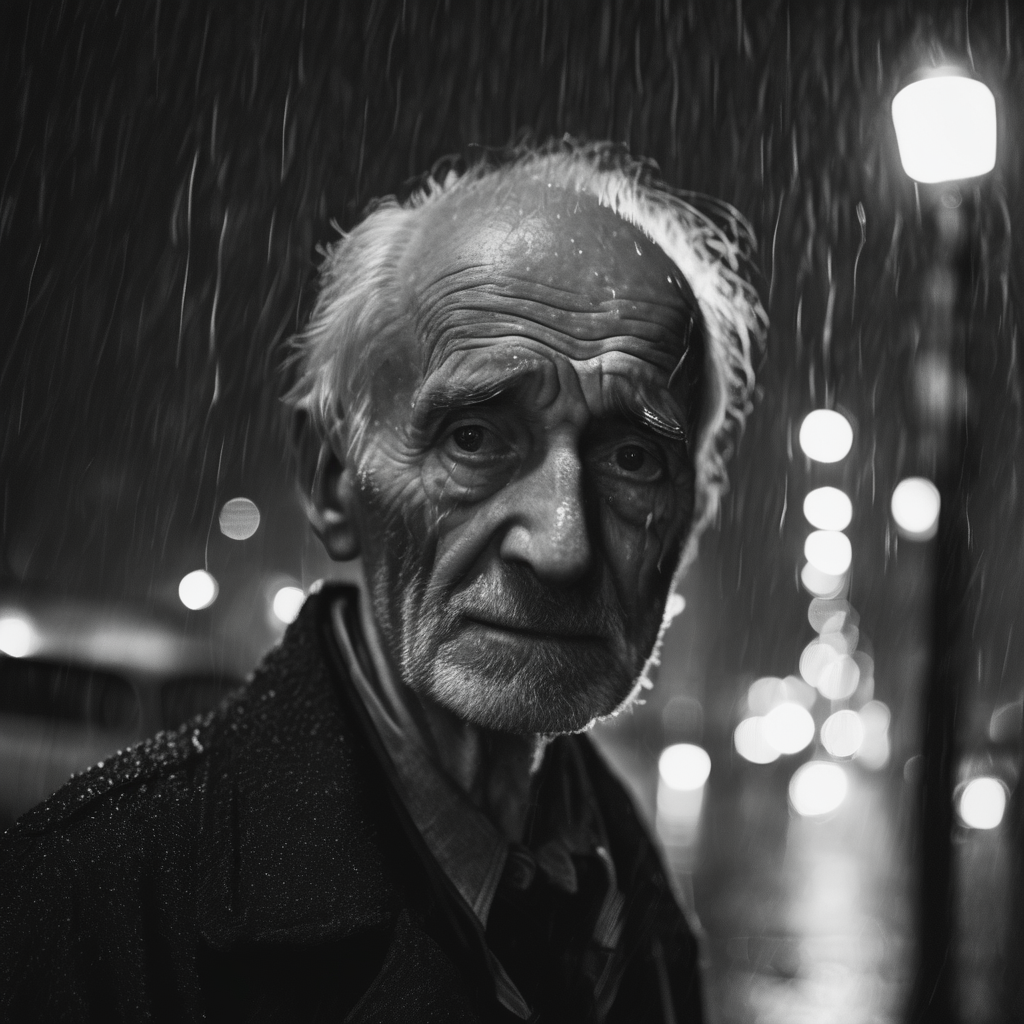

In [43]:
images[6]

## LCM LoRA collection

1. lcm lora sdxl

2. sdv1.5

3. lcm lora ssd 1b